In [0]:
import numpy as np
import matplotlib.pyplot as plt

In [0]:
import tensorflow as tf

In [0]:
D = 2
K = 3
N = int(K * 1e3)
eta = 5e-3
epochs = 5000

def one_hot_encode(y):
	N = len(y)
	K = len(set(y))

	Y = np.zeros((N,K))

	for i in range(N):
		Y[i,y[i]] = 1

	return Y

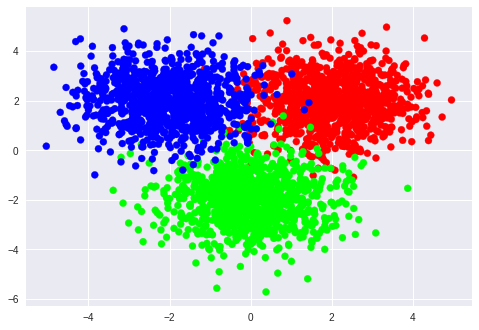

In [0]:
X0 = np.random.randn((N // K), D) + np.array([2, 2])
X1 = np.random.randn((N // K), D) + np.array([0, -2])
X2 = np.random.randn((N // K), D) + np.array([-2, 2])
X_train = np.vstack((X0, X1, X2)).astype(np.float32)

y_train = np.array([0] * (N // K) + [1] * (N // K) + [2] * (N // K)).astype(np.int32)

Y_train = one_hot_encode(y_train).astype(np.int32)

plt.scatter(X_train[:, 0], X_train[:, 1], c=Y_train)


In [0]:
x = tf.placeholder(tf.float32, shape = (None,D))
y = tf.placeholder(tf.float32, shape = (None,K))
w = tf.Variable(tf.random_normal((2,3)))
b = tf.Variable(tf.random_normal((1,1)))
p = tf.nn.softmax(tf.matmul(x,w)+b)
loss = tf.reduce_mean(-tf.reduce_sum(y* tf.log(p), reduction_indices=[1]))




Instructions for updating:
Colocations handled automatically by placer.


In [0]:

J = []
[gradw, gradb] = tf.gradients(loss,[w,b])
w_update = w.assign( w - eta*gradw)
b_update = b.assign(b - eta* gradb)
with tf.Session() as sess:
  sess.run(tf.global_variables_initializer())
  for _ in range (epochs):
    W,B,out = sess.run((w_update,b_update,p), feed_dict = {x: X_train, y: Y_train})
    J.append(sess.run(loss, feed_dict={x: X_train, y: Y_train}))

Instructions for updating:
Use tf.cast instead.


In [0]:
def acc (y, p):
  return np.mean(y == p.argmax(axis=1))

In [0]:
acc(y_train,out)

0.9673333333333334

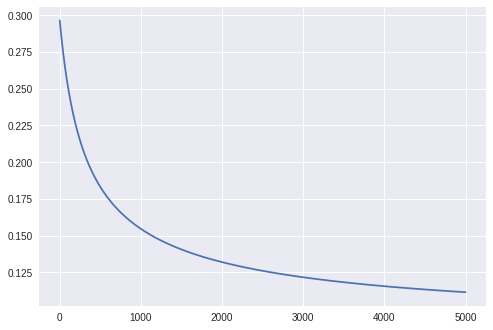

In [0]:

plt.plot(J)

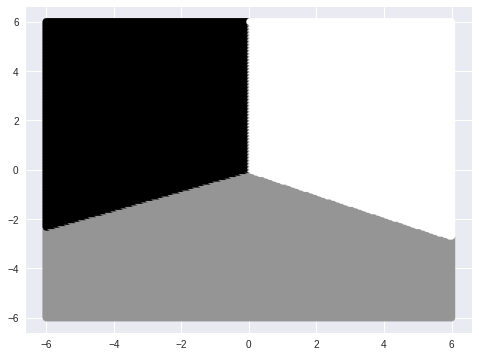

In [0]:
def softmax(H):
	eH = np.exp(H)
	return eH/eH.sum(axis = 1, keepdims = True)

X_vis = np.linspace(-6,6,200)
X_vis =np.vstack([[(i,j) for i in X_vis] for j in X_vis]).astype(np.float32)
X_vis[:10]

p_vis = softmax(X_vis.dot(W))
plt.figure(figsize = (8,6))
plt.scatter(X_vis[:,0], X_vis[:,1], c = p_vis.argmax(axis=1))

In [0]:
p_vis

array([[3.9445051e-11, 9.9995220e-01, 4.7858037e-05],
       [4.2529664e-11, 9.9995512e-01, 4.4853419e-05],
       [4.5855632e-11, 9.9995792e-01, 4.2037587e-05],
       ...,
       [9.9999893e-01, 4.5857512e-11, 1.0908234e-06],
       [9.9999905e-01, 4.2531527e-11, 9.4819137e-07],
       [9.9999917e-01, 3.9446904e-11, 8.2420888e-07]], dtype=float32)